Model Performance: MAE=15.75, R²=-0.06


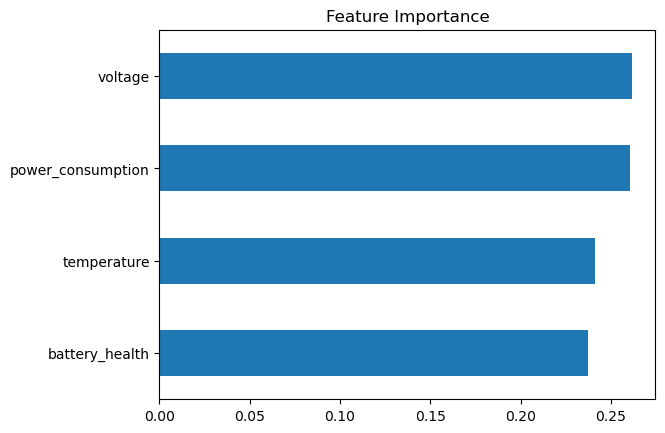

Energy Usage is Efficient


C:\Users\AMIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

data = pd.read_csv("C:/Users/Santhosh/Downloads/iot_energy_data.csv")

data.dropna(inplace=True)  

features = ["temperature", "voltage", "power_consumption", "battery_health"]
target = "energy_efficiency"
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance: MAE={mae:.2f}, R²={r2:.2f}")

feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

def recommend_optimization(temp, volt, power):
    pred_efficiency = model.predict([[temp, volt, power, 1.0]])[0]
    if pred_efficiency < 50:
        return "Optimize Battery Usage & Reduce Load"
    return "Energy Usage is Efficient"

print(recommend_optimization(35, 12.5, 100))
